# Task 2 : To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied using simple linear regression with just two variables.

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import data from external URL

url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported succesfully")

dataset

Data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### We will now plot the dataset in 2-D to see if we a relationship is visible among the parameters

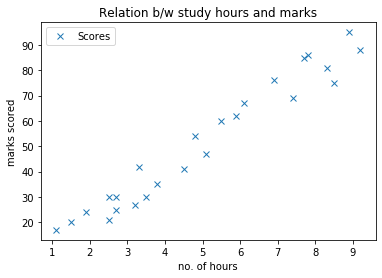

In [6]:
# Plotting the dataset

dataset.plot(x='Hours', y='Scores', style='x')
plt.title('Relation b/w study hours and marks')
plt.xlabel('no. of hours')
plt.ylabel('marks scored')
plt.show()

#### From the above graph, we can see a positive linear correlation between no. of hours studied and the marks scored by the student

Now that we have some insights on the given dataset, we will start building our Supervised ML algorithm. For that, we first need to prepare our data.

## 1. Data Preparation

We first need to divide the data into Attributes (Input) and Labels (Output).

In [7]:
X = dataset.iloc[:, :-1].values      

# We have selected 'Hours' as the X-Axis, i.e. all rows of data upto (not including) the last column. These are the Attributes.

Y = dataset.iloc[:, 1].values        

# We have selected 'Scores' as the Y-Axis, i.e. all rows of data only in the last column. These are the Labels.

## 2. Splitting the Data into Training and Testing sets

After selecting the attributes and labels, the next step is to split this data into training and test sets. We can do this by using Scikit-Learn's built-in train_test_split() method

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

- We have split the data into training and testing set. test_size = 0.2 means 20% of the dataset will be used for testing,
  but all data will be used for training.


- random_state=0 means the testing data will be selected at random, but the same set of random numbers will be selected everytime we run the algorithm. Although it is not a standard practice, we do this here because we also need to compare our results to those given in the dataset.

## 3. Training the Algorithm

After splitting the dataset into testing and training data, we need to train the algorithm.

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit (X_train, Y_train)
print("Training Completed")

Training Completed


In [14]:
# Plotting the Regression Line

line = regressor.coef_*X + regressor.intercept_

#### We've just given the equation of line : y = mx + c. The algorithm will use this line to give results for the test data.


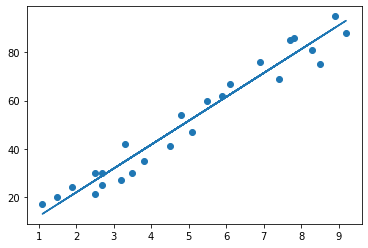

In [15]:
#Plotting for the Test Data

plt.scatter(X,Y)
plt.plot(X, line);
plt.show()

#### We've plotted the dataset again. This time, it will be used to make predictions.

## 4. Making Predictions

In [16]:
print(X_test)  # these are the values of the input variable in our test data, in no. of hours.

Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Compare the test results to actual dataset

df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## 5. Evaluating our Model

To compare how well different algorithms perform on a particular dataset, we use different statistical measures. For our purpose, we can use the mean square error.

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


## What will be predicted score if a student study for 9.25 hrs in a day?

In [25]:
# Testing with our own data
Hours = [[9.25]]
our_pred = regressor.predict(Hours)
print("No. of Hours = {}".format(Hours))
print("Predicted Score = {}".format(our_pred[0]))

No. of Hours = [[9.25]]
Predicted Score = 93.69173248737538
